<a href="https://colab.research.google.com/github/viriditass/Awesome-Korean-NLP-Papers/blob/master/Stacked_Hourglass_Networks_for_Human_Pose_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stacked Hourglass Networks for Human Pose Estimation**

논문 링크: https://arxiv.org/abs/1603.06937

사진 속에 담긴 사람들에 대한 이해를 높일려면 어떻게 해야할까? 당연히 사진속 사람들의 포즈를 이해할 수 있어야한다. 이런 연구주제를 **human pose estimation**이라고 하며, Computer Vision의 분야중 하나다. 본 논문은 ConvNet을 사용하여 down-sampling하는 과정에서 이미지의 모든 scale에 대한 정보를  추출하고, up-sampling하는 과정에서 pixel-wise output을 생성하는 것이 목표다.

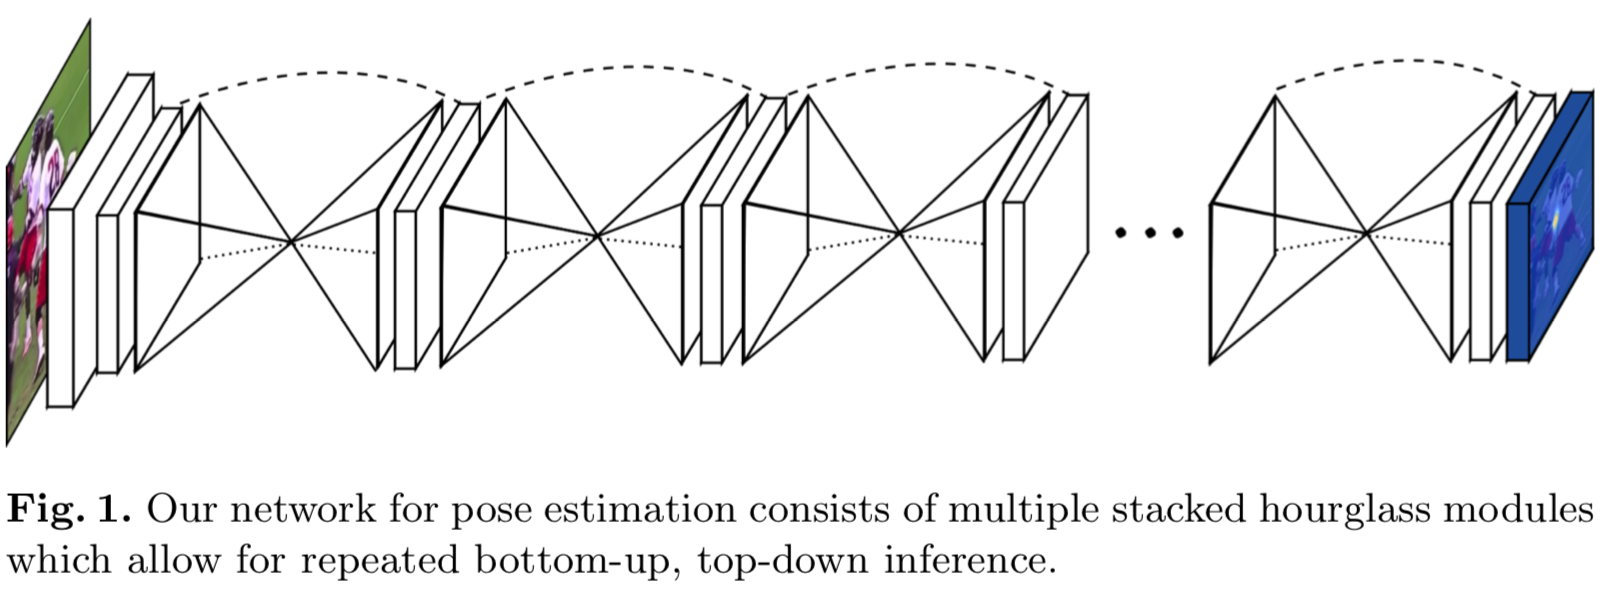

이렇게 down-sampling => up-sampling하는 과정이 마치 모래시계(hourglass)같아서 single hourglass network라는 명칭이 생겼고, 이를 위의 그림 Fig. 1과 같이 여러개 겹처 쌓은 것을 stacked hourglass network라 한다. 이 구조덕분에 여러 scale에 대해 반복적인 **bottom-up**과 **top-down** inference를 가능하게 한다.

## **Hourglass Network**

face나 hand와 같은 feature를 식별하는 경우는 **local evidence**가 중요하다. 하지만 전체적인 pose(human pose)를 추정하기 위해선 full body에 대한 이해가 필요하다. 뿐만 아니라 이를 위해서는 여러 scale에 걸쳐 필요한 정보를 포착해야한다. 기존의 방식들은 모든 feature들을 잡아내기 위해 다수의 파이프라인을 사용하였다. 하지만 Hourglass는 **skip layer**를 이용해 단 하나의 파이프라인으로도 **spatial information을 유지**하여 model의 output인 pixel 단위의 예측에 반영하도록 한다.

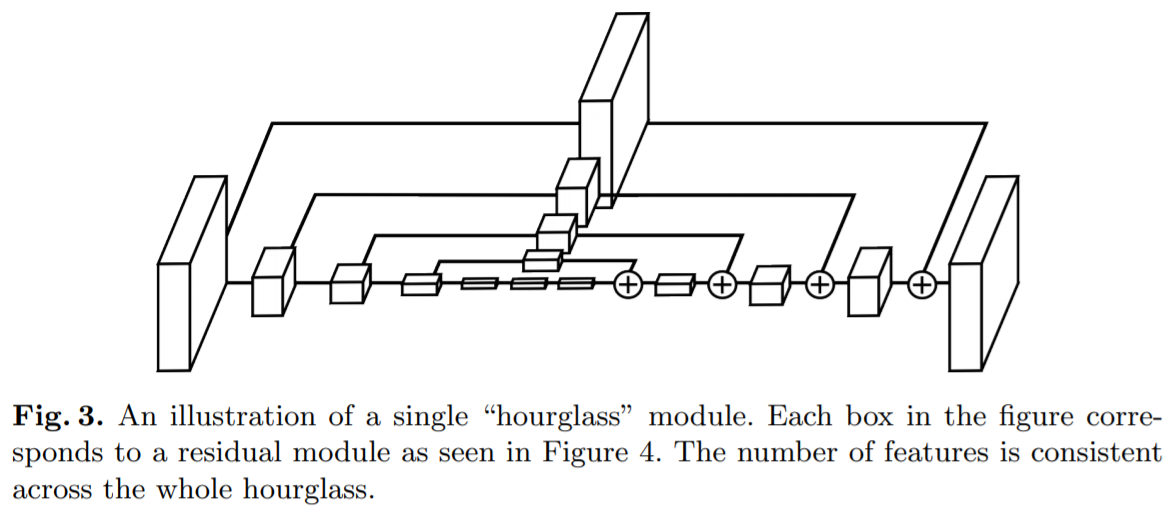

위의 그림 Fig. 3은 single hourglass의 구조를 그림으로 나타낸 것이다. 이 그림을 통해 알 수 있는 것들은 먼저 convolution layer와 maxpooling layer를 사용해 down-sampling을 하였다. 이때 skip layer를 위해 매 maxpooling 단계에서의 입력을 branch로 보내고 이에 convolution layer를 적용한다. (이를 통해 scale 마다의 feature를 추출한다.) 그 다음 up-sampling 단계에서는 scale 별로 추출한 feature들을 조합한다. Upsampling으로는 **Nearest Neighbor Upsampling** 방식을, feature와의 조합에는 **elementwise addition** 연산을 이용한다.

그리고 stacked hourglass network는 위의 그림 Fig. 3과 같은 여러 single hourglass를 stack한 뒤 두번의 1 x 1 convolution layer를 이용해 최종적인 output을 구한다.

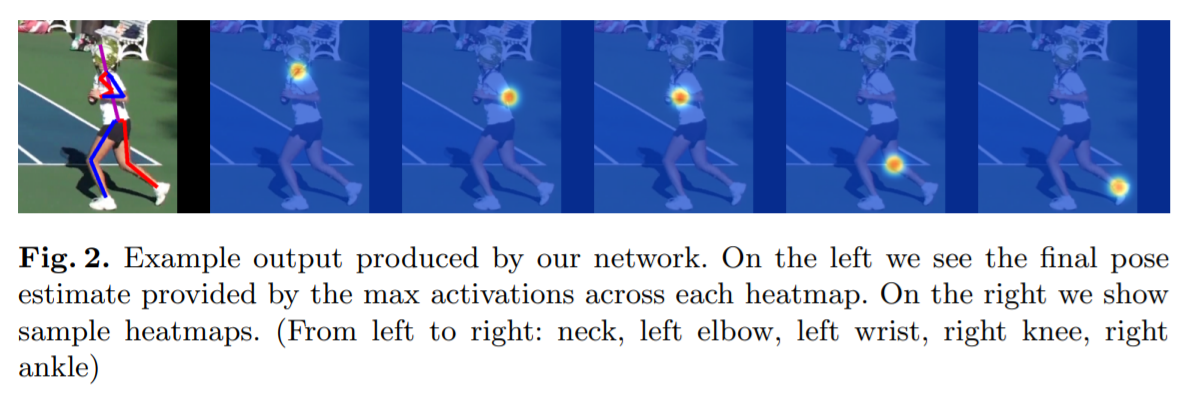

위의 그림 Fig. 2는 최종적인 output이다. 그림을 보면 알 수 있듯이 각 관절에 대한 추정이 담긴 heatmap이다.

### **Layer Implementation**

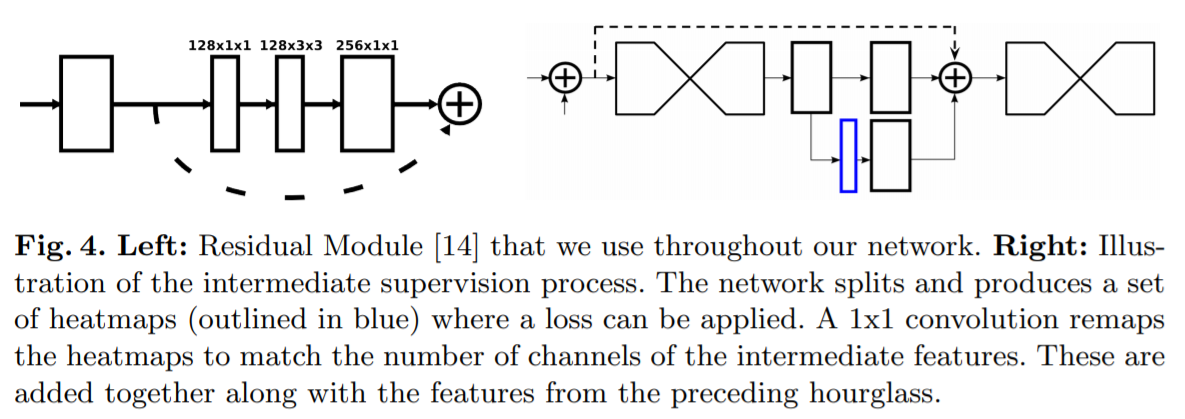

위의 그림 Fig. 4에서 왼쪽 부분은 residual module이다. ResNet과 같이 메모리 사용량을 줄이기 위해 **bottleneck** 구조를 활용한다.

위의 그림 Fig. 4에서 오른쪽 부분을 보면 그림과 같이 hourglass network 사이에 **Intermediate Supervision**(중간 단계)가 존재한다. 파란색 박스 부분에서 hourglass network를 통과하여 feature를 추출한 결과인 heatmap을 생성한다. 그리고 추출된 heatmap을 다시 Ground Truth와 비교해 loss 값을 뽑아낸다. 이러한 과정 덕분에 예측/조정을 거쳐 학습이 보다 원활히 진행된다.

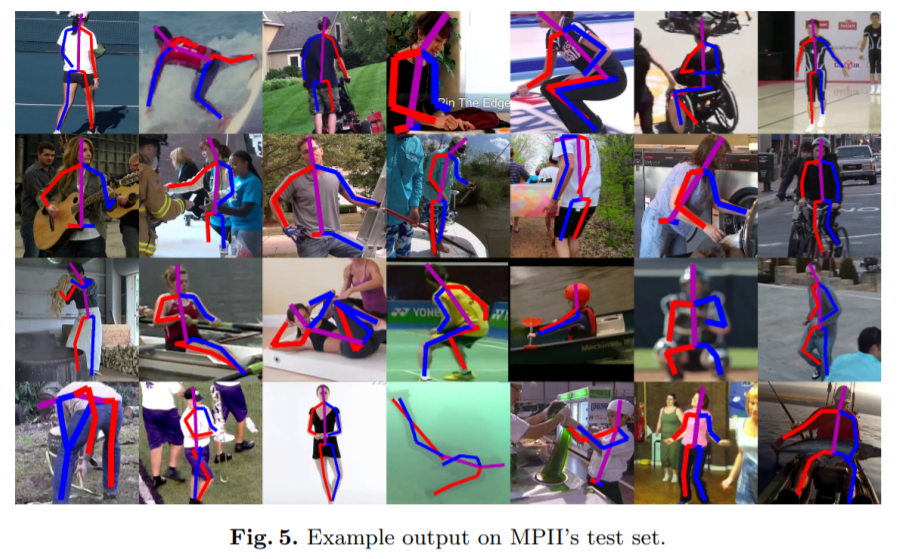

위의 그림 Fig. 5는 MPII Human Pose dataset에 대한 model의 output이다. 특정 관절이 안보이는 경우 등을 제외하면 물 속에서 찍힌 흐릿한 사진도 keypoint를 잘 찾아내는 것을 알 수 있다.

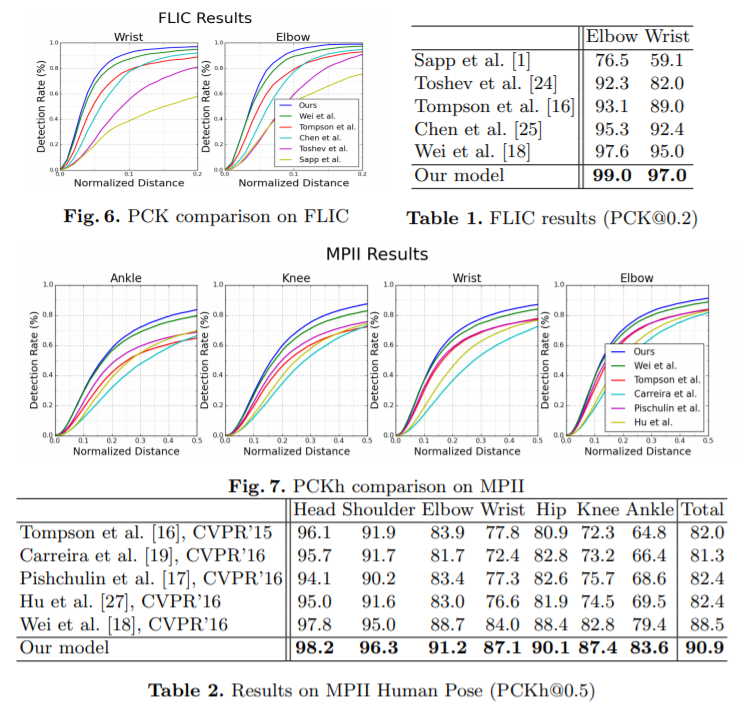

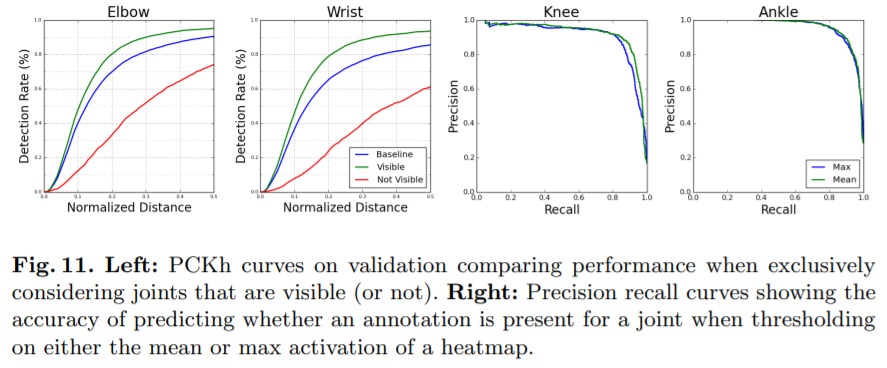

위의 그림 Fig. 6, 7, 11 그리고 표 Table 2는 서로 다른 5가지 네트워크 구조들의 성능을 비교한 결과다. stacked hourglass network의 성능이 제일 뛰어난 것을 확인할 수 있다. 특히 손목, 팔꿈치, 무릎과 발목부분 정확도의 경우 타 model들에 비해 약 3.5% 상승되었다.

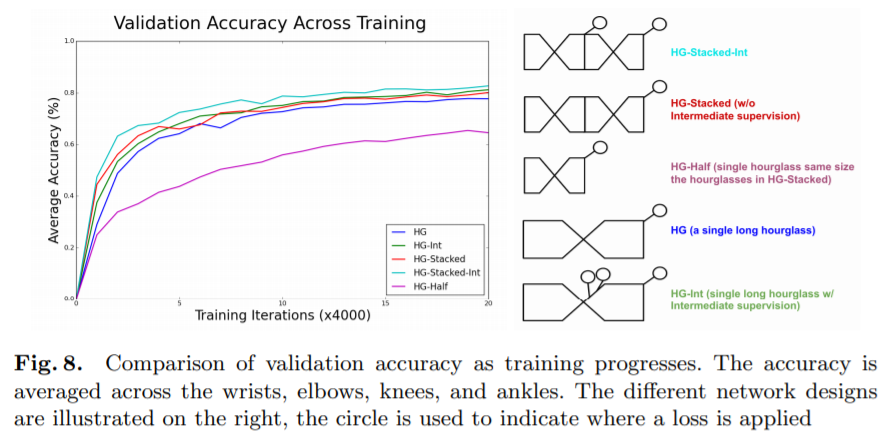

위의 그림 Fig. 8을 보면 네트워크가 점점 깊어질수록 성능이 좋아지는 것을 볼 수 있다. 또한 HG-Stacked-Int(두 개의 HG + Intermediate Supervision)가 가장 좋은 성능을 보이는 것을 알 수 있다.

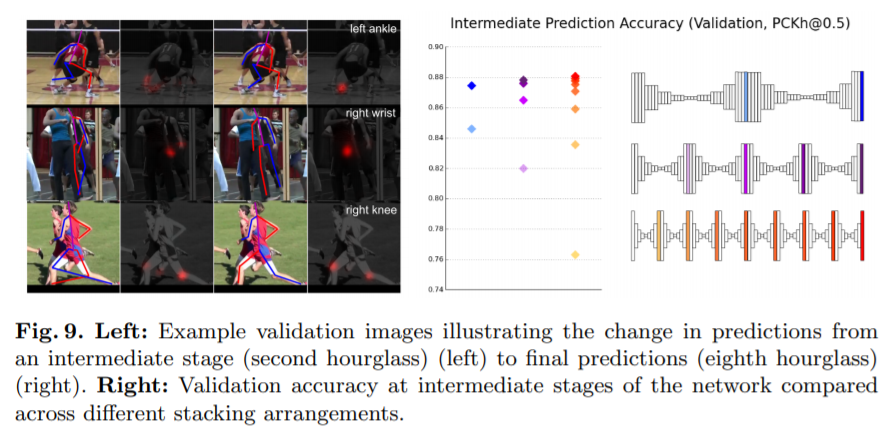

위의 그림 Fig. 9는 HG의 갯수가 얼마나 정확에 영향을 주는지 알 수 있는 그림이다. 네트워크가 많이 쌓일수록 빨간색으로 표시되는 부분에 정확도가 가장 높아지는 것을 알 수 있다.

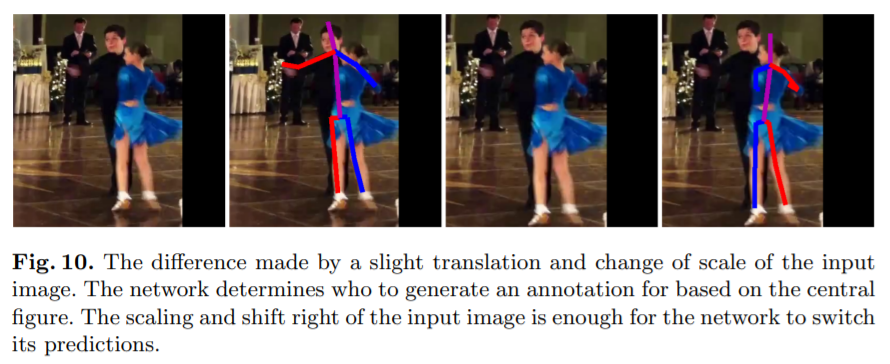

위의 그림 Fig. 10을 보면 한계점을 알 수 있다. 이렇게 겹쳐져 있는 경우 Center 기준으로 사람을 탐지하기 때문에 오류를 범할 수 있다. 하지만 저런 경우에도 한 인물에 관해선 이상한 keypoint를 찾지 않기 때문에 괜찮은 성능을 보여준다고 한다.